In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 10                #number of agents
N_buckets = 50               #number of buckets
max_turns = 100             #max number of moves in single game
turn = 0                     #starting turn
rn_seed = 14                 #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment)
print 'state = ', state
reward, bucket_value = get_reward(state)
print 'reward = ', reward
print 'bucket_value = ', bucket_value
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 100, 'rn_seed': 14, 'N_agents': 10, 'bucket_params': {'p0': array([ 0.        ,  0.00020408,  0.00040816,  0.00061224,  0.00081633,
        0.00102041,  0.00122449,  0.00142857,  0.00163265,  0.00183673,
        0.00204082,  0.0022449 ,  0.00244898,  0.00265306,  0.00285714,
        0.00306122,  0.00326531,  0.00346939,  0.00367347,  0.00387755,
        0.00408163,  0.00428571,  0.0044898 ,  0.00469388,  0.00489796,
        0.00510204,  0.00530612,  0.0055102 ,  0.00571429,  0.00591837,
        0.00612245,  0.00632653,  0.00653061,  0.00673469, -0.00693878,
        0.00714286, -0.00734694,  0.00755102,  0.0077551 ,  0.00795918,
       -0.00816327,  0.00836735,  0.00857143,  0.00877551,  0.00897959,
       -0.00918367,  0.00938776,  0.00959184,  0.00979592, -0.01      ]), 'sigma': array([ 0.        ,  0.01428571,  0.02020305,  0.02474358,  0.02857143,
        0.03194383,  0.03499271,  0.03779645,  0.0404061 ,  0.04285714,
        0.0451754 ,  0.04738035,  0.

In [6]:
##illustrate moving an agent
#locations = np.array([4, 3, 2, 1, 0])
#state_moved = move_agent(state, locations)
#print 'locations = ', locations
#print 'state_moved = ', state_moved
#state_next = update_state(state_moved, bucket_value, environment)
#print 'state_next = ', state_next
#state_vector_next = state2vector(state_next, environment)
#print 'state_vector_next = ', state_vector_next
#reward_next, bucket_value = get_reward(state_next)
#print 'reward_next = ', reward_next

In [7]:
#play 1 game of randomly-moving agents and stash history in dataframe
turn = 0
strategy = 'random'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
print 'number of memories generated during 1 game = ', len(memories)
game_history.tail()

number of memories generated during 1 game =  100


,turn,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5,agent_value_6,agent_value_7,agent_value_8,agent_value_9
95,95,8.622433,0.327367,0.700025,1.319417,1.886820,0.641271,0.674516,1.458866,0.517210,0.209718,0.641312
96,96,8.648789,0.283105,0.692834,1.302197,1.959118,0.681720,0.849333,1.500979,0.503073,0.217133,0.632942
97,97,8.701276,0.283105,0.670393,1.367770,1.937907,0.693251,0.858709,1.551669,0.490361,0.227048,0.568575
98,98,8.493968,0.297114,0.722483,1.381592,1.958104,0.670897,0.825758,1.492126,0.471544,0.224757,0.656901
99,99,8.802090,0.310100,0.706365,1.288501,1.894317,0.662889,0.868718,1.443519,0.511857,0.241686,0.566015


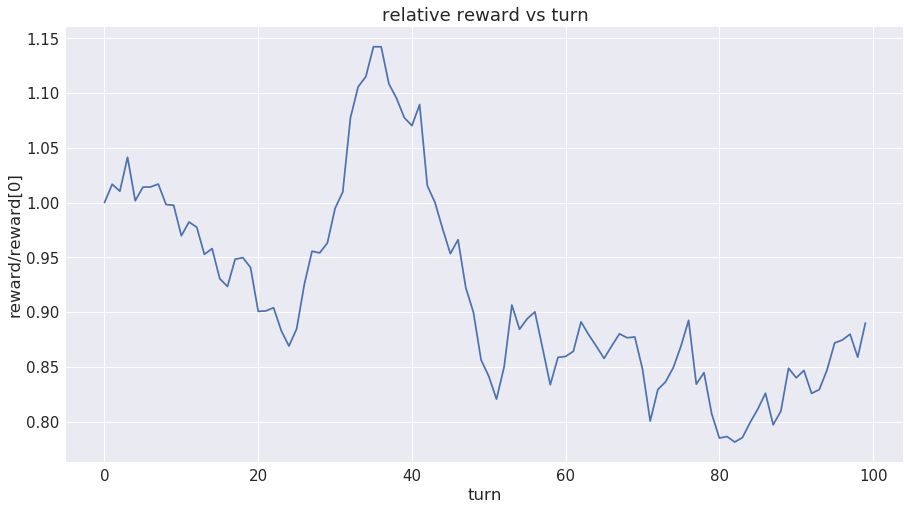

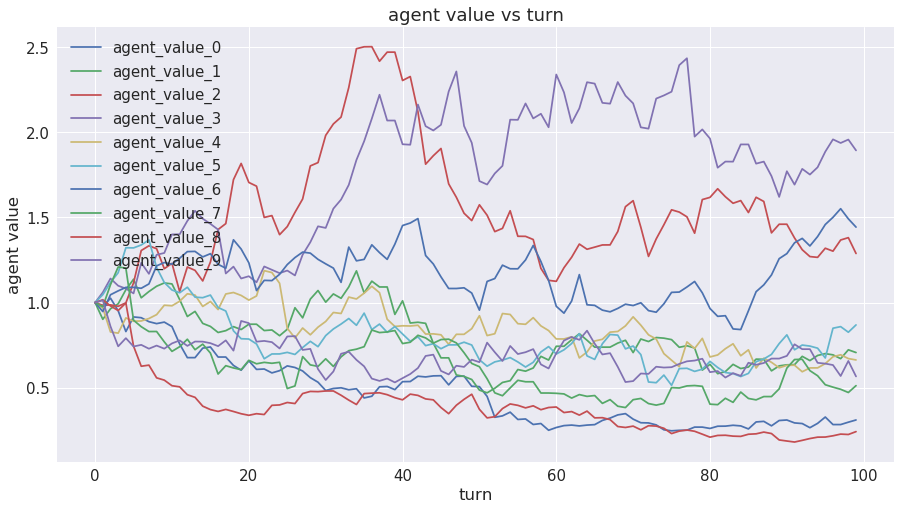

In [8]:
#plot relative reward versus turn, and agent values vs turn
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

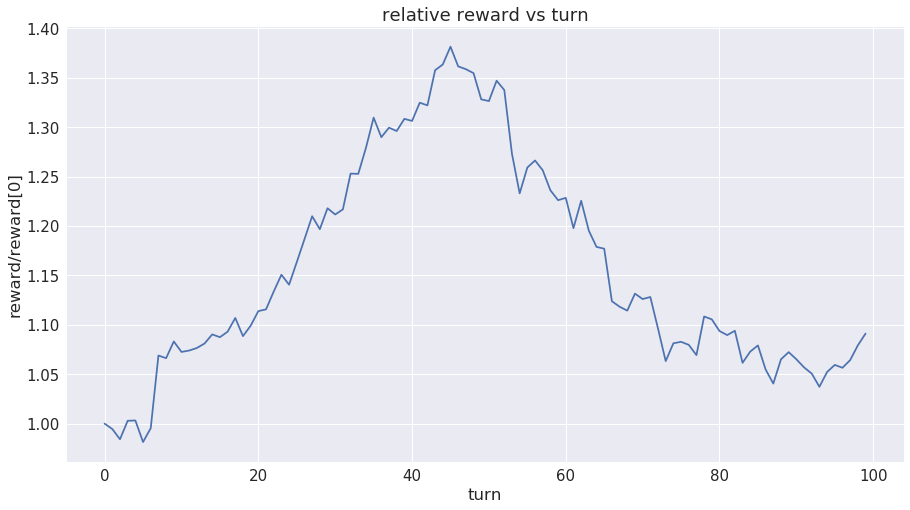

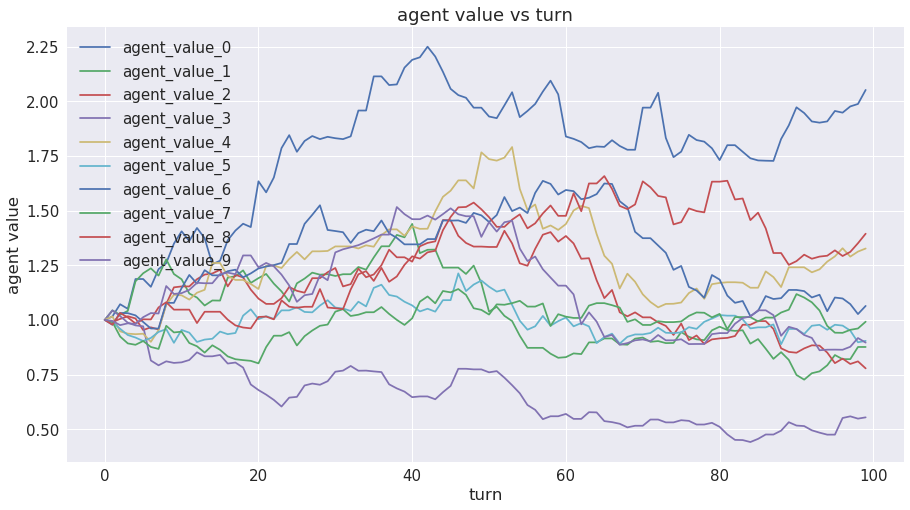

In [9]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
turn = 0
strategy = 'low'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

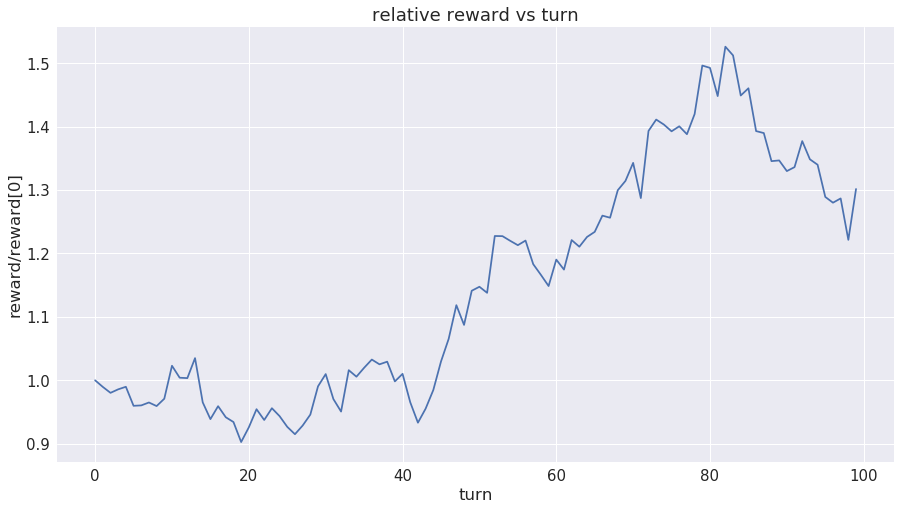

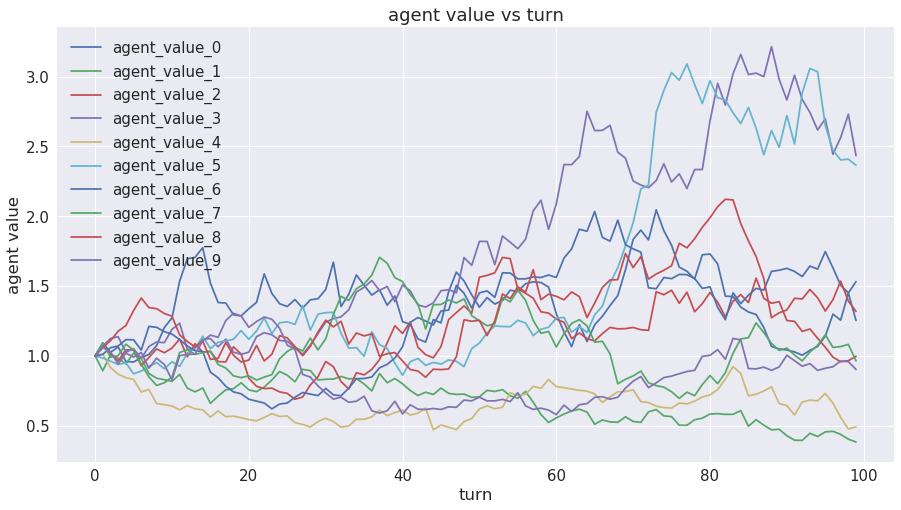

In [10]:
#play a medium-risk, medium-reward game with all agents moving randomly among the middle third of buckets
turn = 0
strategy = 'medium'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

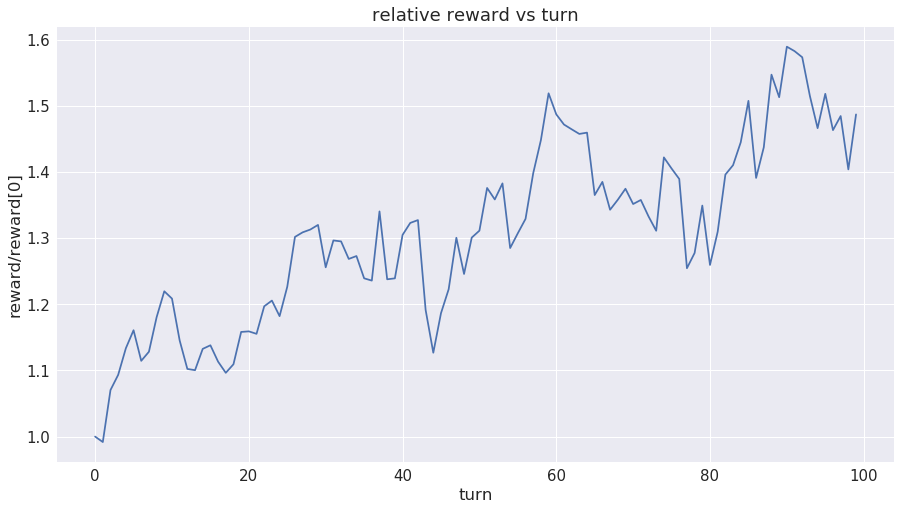

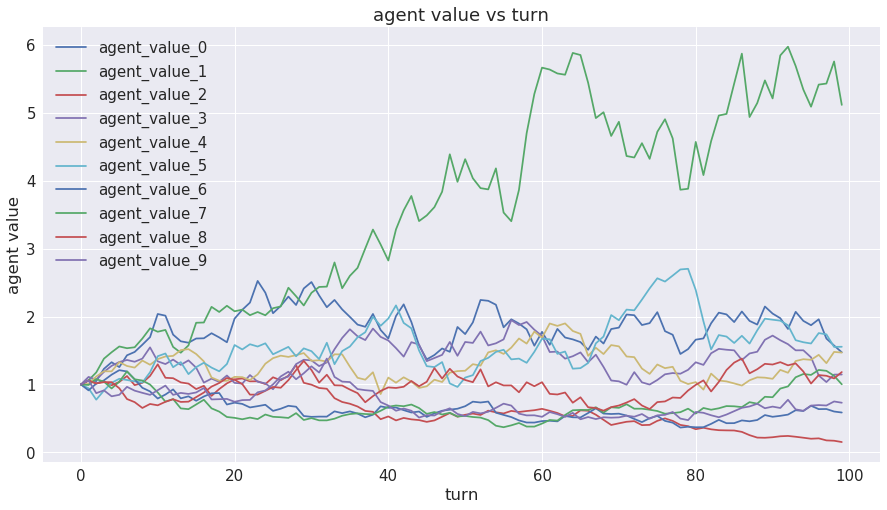

In [11]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
turn = 0
strategy = 'high'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [12]:
#play 50 games using each strategy, and generate stats for each strategy
N_games = 50
strategies = ['low', 'medium', 'random', 'high']
game_histories = pd.DataFrame()
for strategy in strategies:
    for game in range(N_games):
        turn = 0
        memories = play_one_game(environment, turn, strategy)
        game_history = memories2timeseries(memories, environment)
        game_history['strategy'] = strategy
        game_history['game'] = game
        game_histories = game_histories.append(game_history)
game_stats = game_histories.groupby(['strategy', 'turn'])['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

mean       std
strategy turn                     
random   95    13.674496  0.480534
         96    13.687071  0.484884
         97    13.802344  0.497931
         98    13.887002  0.501112
         99    13.909211  0.505675

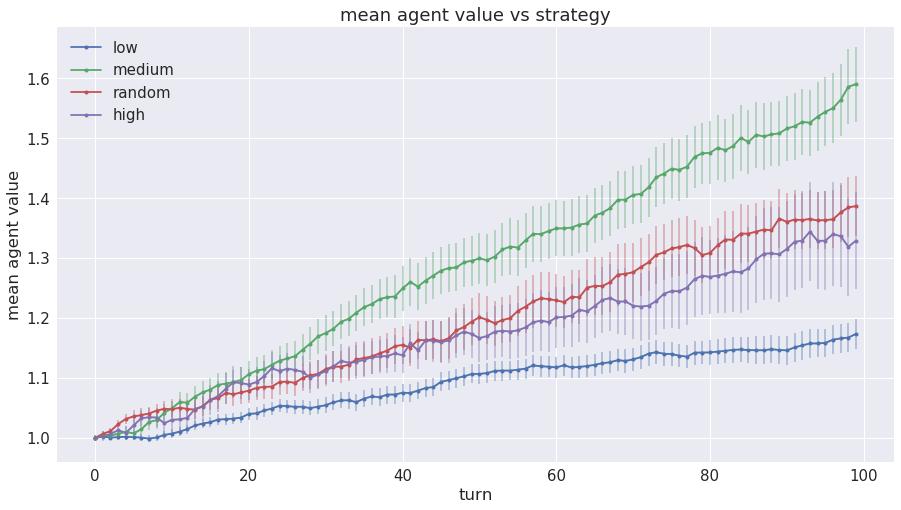

In [13]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('mean agent value vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean agent value')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= reward[0]
    reward /= reward[0]
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [14]:
break this notebook

SyntaxError: invalid syntax (<ipython-input-14-0523fe50cee9>, line 1)

In [ ]:
#play 10 games making random actions, and stash moves in memories queue
N_games = 5
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
print 'number of memories = ', len(memories)

In [ ]:
#build model
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = N_inputs*N_outputs
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

In [ ]:
#train model
N_games = 20                               #number of games played during training
gamma = 0.85                                #discount for future rewards
batch_size = 100                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

In [ ]:
#plot rewards vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

In [ ]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [ ]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories, environment)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
game_history.head()

In [ ]:
#show grayscale of agent locations
cols = [col for col in game_history.columns if ('agents_' in col)]
df = game_history[cols]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.imshow(df.T, aspect='auto', cmap='gray')
df.tail(10)

In [ ]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 11))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0